In [15]:
pip install dask pandas numpy matplotlib

Note: you may need to restart the kernel to use updated packages.


In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt

In [3]:
# Simulating a dataset with 1 lakh (100,000) rows
num_rows = 100_000
df = pd.DataFrame({
    'id': np.arange(num_rows),
    'value': np.random.randint(1, 1000, size=num_rows),
    'category': np.random.choice(['A', 'B', 'C', 'D'], size=num_rows),
    'timestamp': pd.date_range(start='1/1/2022', periods=num_rows, freq='min')  # Fixed warning
})

# Save dataset as CSV
csv_path = "large_dataset.csv"
df.to_csv(csv_path, index=False)
print(f"Dataset saved at: {csv_path}")

Dataset saved at: large_dataset.csv


In [4]:
# Load dataset using Dask with explicit data types
dask_df = dd.read_csv(csv_path, dtype={'category': 'object'}, assume_missing=True)

# Verify column names
print("Columns in Dask DataFrame:", dask_df.columns)

# Display basic info
print(dask_df.head())

Columns in Dask DataFrame: Index(['id', 'value', 'category', 'timestamp'], dtype='object')
    id  value category            timestamp
0  0.0  317.0        D  2022-01-01 00:00:00
1  1.0  324.0        D  2022-01-01 00:01:00
2  2.0  317.0        B  2022-01-01 00:02:00
3  3.0  846.0        C  2022-01-01 00:03:00
4  4.0  353.0        C  2022-01-01 00:04:00


In [6]:
# Pandas Statistics
start_time = time.time()
pandas_stats = df['value'].describe()
pandas_stats_time = time.time() - start_time

# Dask Statistics
start_time = time.time()
dask_stats = dask_df['value'].describe().compute()
dask_stats_time = time.time() - start_time

print("\nPandas Basic Statistics:\n", pandas_stats)
print("\nDask Basic Statistics:\n", dask_stats)
print(f"Pandas Time: {pandas_stats_time:.4f} seconds, Dask Time: {dask_stats_time:.4f} seconds")


Pandas Basic Statistics:
 count    100000.000000
mean        499.068410
std         288.713532
min           1.000000
25%         249.000000
50%         498.000000
75%         749.000000
max         999.000000
Name: value, dtype: float64

Dask Basic Statistics:
 count    100000.000000
mean        499.068410
std         288.713532
min           1.000000
25%         249.000000
50%         498.000000
75%         749.000000
max         999.000000
Name: value, dtype: float64
Pandas Time: 0.0120 seconds, Dask Time: 0.0970 seconds


In [11]:
# Pandas Count
start_time = time.time()
pandas_category_count = df['category'].value_counts()
pandas_category_time = time.time() - start_time

# Dask Count
start_time = time.time()
dask_category_count = dask_df['category'].value_counts().compute()
dask_category_time = time.time() - start_time

print("\nPandas Category Distribution:\n", pandas_category_count)
print("\nDask Category Distribution:\n", dask_category_count)
print(f"Pandas Time: {pandas_category_time:.4f} seconds, Dask Time: {dask_category_time:.4f} seconds")


Pandas Category Distribution:
 category
C    25109
A    25025
D    24943
B    24923
Name: count, dtype: int64

Dask Category Distribution:
 category
A    25025
B    24923
C    25109
D    24943
Name: count, dtype: int64
Pandas Time: 0.0169 seconds, Dask Time: 0.2050 seconds


In [12]:
# Convert timestamp column to datetime (Pandas)
df['hour'] = df['timestamp'].dt.hour
start_time = time.time()
pandas_time_series = df.groupby('hour')['value'].mean()
pandas_time_series_time = time.time() - start_time

# Dask Time Aggregation
dask_df['timestamp'] = dd.to_datetime(dask_df['timestamp'])
dask_df['hour'] = dask_df['timestamp'].dt.hour
start_time = time.time()
dask_time_series = dask_df.groupby('hour')['value'].mean().compute()
dask_time_series_time = time.time() - start_time

print("\nPandas Value by Hour:\n", pandas_time_series)
print("\nDask Value by Hour:\n", dask_time_series)
print(f"Pandas Time: {pandas_time_series_time:.4f} seconds, Dask Time: {dask_time_series_time:.4f} seconds")


Pandas Value by Hour:
 hour
0     500.428095
1     495.704286
2     502.143810
3     503.215952
4     498.365952
5     499.211905
6     494.689048
7     498.065000
8     499.377619
9     491.997381
10    500.589952
11    498.399034
12    508.125845
13    496.927053
14    494.462077
15    493.007488
16    501.945652
17    500.721014
18    494.120290
19    503.436232
20    494.412077
21    503.523430
22    501.441787
23    503.424638
Name: value, dtype: float64

Dask Value by Hour:
 hour
0     500.428095
1     495.704286
2     502.143810
3     503.215952
4     498.365952
5     499.211905
6     494.689048
7     498.065000
8     499.377619
9     491.997381
10    500.589952
11    498.399034
12    508.125845
13    496.927053
14    494.462077
15    493.007488
16    501.945652
17    500.721014
18    494.120290
19    503.436232
20    494.412077
21    503.523430
22    501.441787
23    503.424638
Name: value, dtype: float64
Pandas Time: 0.0032 seconds, Dask Time: 0.2724 seconds


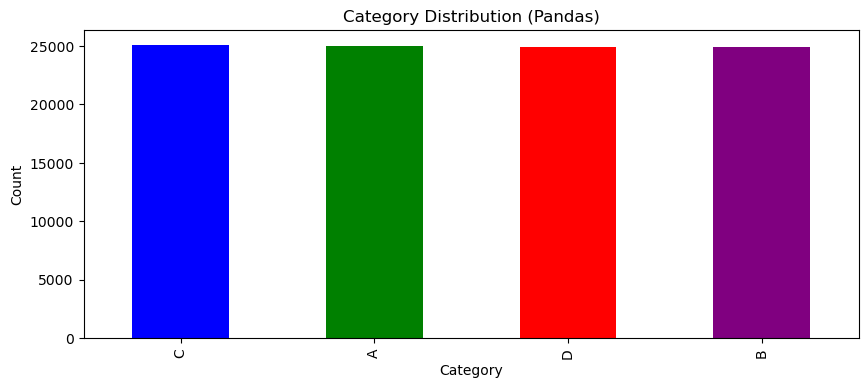

In [14]:
# Plot Category Distribution
plt.figure(figsize=(10, 4))
pandas_category_count.plot(kind='bar', color=['blue', 'green', 'red', 'purple'])
plt.title("Category Distribution (Pandas)")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()
